In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mob_data.csv')

In [3]:
df.head()

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
0,5999,14,2,16,256,6.1,5,4000,1,4.5,1
1,5999,14,2,16,256,6.1,5,4000,1,4.5,1
2,8990,49,3,64,256,5.5,8,3300,1,4.3,1
3,10000,10,2,16,128,5.0,5,2630,1,4.2,1
4,10000,10,3,16,256,5.2,5,3000,1,4.2,1


In [4]:
# import sklearn.preprocessing

In [5]:
# pp.Binarizer?

In [6]:
from sklearn.preprocessing import LabelEncoder

price_lb = LabelEncoder()
ram_lb = LabelEncoder()
Rom_lb = LabelEncoder()
Expandable_lb = LabelEncoder()
Screen_in_inch_lb = LabelEncoder()
Secondary_Camera_lb = LabelEncoder()
Battery_details_lb= LabelEncoder()
Warranty_lb= LabelEncoder()
Rating_lb= LabelEncoder()
Dual_sim_num_lb= LabelEncoder()

df['price_encoded'] = price_lb.fit_transform(df.Price_in_Rupees)
df['Ram_encoded'] = ram_lb.fit_transform(df.Ram)
df['Rom_encoded'] = Rom_lb.fit_transform(df.Rom)
df['Expand_encoded'] = Expandable_lb.fit_transform(df['Expandable_GB/TB'])
df['Screen_encoded'] = Screen_in_inch_lb.fit_transform(df.Screen_in_inch)
df['Secondary_Camera_encoded'] = Secondary_Camera_lb.fit_transform(df['Secondary_Camera(MP)'])
df['Battery_encoded'] = Battery_details_lb.fit_transform(df.Battery_details)
df['Warranty_encoded'] = Warranty_lb.fit_transform(df['Warranty(Year)'])
df['Rating_encoded'] = Rating_lb.fit_transform(df.Rating)
df['Dual_sim_encoded'] = Dual_sim_num_lb.fit_transform(df.Dual_sim_num)

In [7]:
df.head()

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,...,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Rating_encoded,Dual_sim_encoded
0,5999,14,2,16,256,6.1,5,4000,1,4.5,...,40,1,2,6,19,3,41,0,12,0
1,5999,14,2,16,256,6.1,5,4000,1,4.5,...,40,1,2,6,19,3,41,0,12,0
2,8990,49,3,64,256,5.5,8,3300,1,4.3,...,71,2,5,6,9,4,31,0,10,0
3,10000,10,2,16,128,5.0,5,2630,1,4.2,...,81,1,2,5,5,3,16,0,9,0
4,10000,10,3,16,256,5.2,5,3000,1,4.2,...,81,2,2,6,6,3,22,0,9,0


In [8]:
df.Price_in_Rupees[0:2]

0    5999
1    5999
Name: Price_in_Rupees, dtype: int64

In [9]:
df.price_encoded[0:2] # After Label Encodig

0    40
1    40
Name: price_encoded, dtype: int64

In [10]:
df.head() # All Columns After Label Encoding 

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,...,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Rating_encoded,Dual_sim_encoded
0,5999,14,2,16,256,6.1,5,4000,1,4.5,...,40,1,2,6,19,3,41,0,12,0
1,5999,14,2,16,256,6.1,5,4000,1,4.5,...,40,1,2,6,19,3,41,0,12,0
2,8990,49,3,64,256,5.5,8,3300,1,4.3,...,71,2,5,6,9,4,31,0,10,0
3,10000,10,2,16,128,5.0,5,2630,1,4.2,...,81,1,2,5,5,3,16,0,9,0
4,10000,10,3,16,256,5.2,5,3000,1,4.2,...,81,2,2,6,6,3,22,0,9,0


In [11]:
a = df[['Ram','Rom','Expandable_GB/TB','Screen_in_inch','Secondary_Camera(MP)',
         'Battery_details','Warranty(Year)','Rating','Dual_sim_num']]
b = df.Price_in_Rupees

In [12]:
a.shape

(696, 9)

In [13]:
b.shape

(696,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(a,b,test_size=0.20,random_state=2)

In [16]:
y_test_.shape

(140,)

In [17]:
# from sklearn.preprocessing import OneHotEncoder
# price_ohe = OneHotEncoder()
# ram_ohe = OneHotEncoder()
# Xp = price_ohe.fit_transform(mob.price_encoded.values.reshape(-1,1)).toarray()
# Xr = ram_ohe.fit_transform(mob.Ram_encoded.values.reshape(-1,1)).toarray()

In [18]:
# mobOneHot = pd.DataFrame(Xp,columns = ["price_"+str(int(i)) for i in range(Xp.shape[1])])
# mob = pd.concat([mob, mobOneHot], axis=1)

# dfOneHot = pd.DataFrame(Xm, columns = ["Make"+str(int(i)) for i in range(X.shape[1])])
# df = pd.concat([df, dfOneHot], axis=1)

In [19]:
c=df['Price_in_Rupees']

In [20]:
d=df['price_encoded']

In [21]:
df.columns

Index(['Price_in_Rupees', 'Off(%)', 'Ram', 'Rom', 'Expandable_GB/TB',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)', 'Rating', 'Dual_sim_num', 'price_encoded',
       'Ram_encoded', 'Rom_encoded', 'Expand_encoded', 'Screen_encoded',
       'Secondary_Camera_encoded', 'Battery_encoded', 'Warranty_encoded',
       'Rating_encoded', 'Dual_sim_encoded'],
      dtype='object')

In [22]:
df=df.drop(['Price_in_Rupees','Off(%)','Rom','Ram','Expandable_GB/TB','Screen_in_inch','Secondary_Camera(MP)','Battery_details','Warranty(Year)','Rating','Dual_sim_num'],axis='columns')

In [23]:
df.head()

,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Rating_encoded,Dual_sim_encoded
0,40,1,2,6,19,3,41,0,12,0
1,40,1,2,6,19,3,41,0,12,0
2,71,2,5,6,9,4,31,0,10,0
3,81,1,2,5,5,3,16,0,9,0
4,81,2,2,6,6,3,22,0,9,0


In [24]:
x = df[['Ram_encoded','Rom_encoded','Expand_encoded','Screen_encoded','Secondary_Camera_encoded',
         'Battery_encoded','Warranty_encoded','Rating_encoded','Dual_sim_encoded']]

In [25]:
y = df.price_encoded

In [26]:
df.drop(['price_encoded'],axis=1).head()

,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Rating_encoded,Dual_sim_encoded
0,1,2,6,19,3,41,0,12,0
1,1,2,6,19,3,41,0,12,0
2,2,5,6,9,4,31,0,10,0
3,1,2,5,5,3,16,0,9,0
4,2,2,6,6,3,22,0,9,0


In [27]:
import seaborn as sns

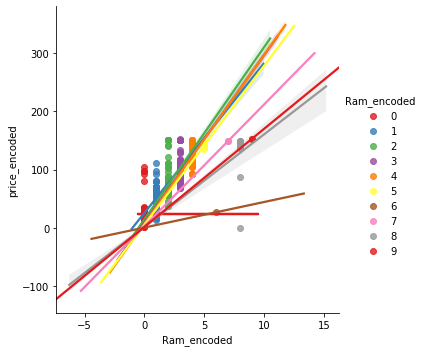

In [28]:
g = sns.lmplot(x="Ram_encoded", y="price_encoded", hue="Ram_encoded",data=df, palette="Set1")

In [29]:
y.shape, x.shape

((696,), (696, 9))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=2)

In [32]:
y_test.shape

(140,)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression()

In [35]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
prediction_price=lr_model.predict(X_test)

In [37]:
# print("Train result:", lr_model.score(X_train, y_train))
# print("Test result:", lr_model.score(X_test, y_test))

In [38]:
accuracy = lr_model.score(X_test,y_test)*100
accuracy =  np.around(accuracy, decimals=2)
print("ACCURACY:",accuracy,"%")

ACCURACY: 78.15 %


In [39]:
from sklearn import metrics

In [40]:
metrics.r2_score(y_test,prediction_price)

0.7815452656945625

In [41]:
# comp = pd.DataFrame({"Actual_price":y_test_,"Actual_price_encoded":y_test,"predicted_price":prediction_price})

In [42]:
# act_and_pred=comp.head(51)

In [43]:
# act_and_pred=np.around(act_and_pred, decimals=0)

In [ ]:
y_test.shape

In [ ]:
# act_and_pred.head(10)

In [49]:
compar = pd.DataFrame({"Actual_price_(encoded)":y_test,"predicted_price":prediction_price})

In [50]:
act_and_pred2=compar.head(100)

In [51]:
act_and_pred2.head(3)

,Actual_price_(encoded),predicted_price
89,91,93.001219
176,25,22.274441
37,111,124.434770


In [52]:
# act_and_pred2.to_csv('final_output.csv')

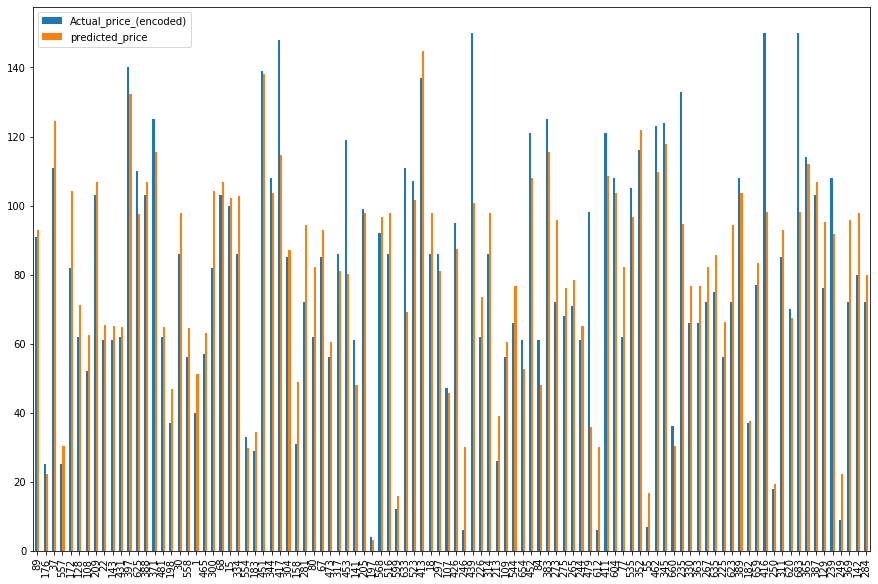

In [53]:
import matplotlib.pyplot as plt
act_and_pred2.plot(kind='bar',figsize=(15,10))
# plt.grid(linewidth='0.5', color='green')
# plt.grid(linewidth='0.5', color='blue')
plt.show()

In [54]:
# act_and_pred2.hist(bins=50, figsize=(15, 5))
# plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_price))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_price))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_price))) 

Mean Absolute Error: 11.828262494003226
Mean Squared Error: 265.52352635007315
Root Mean Squared Error: 16.29489264616595


In [56]:
metrics.mean_squared_log_error(y_test,prediction_price)

0.08426851098195985

In [57]:
metrics.median_absolute_error(y_test,prediction_price)

8.340373570095668

In [58]:
metrics.explained_variance_score(y_test,prediction_price)     

0.7818822638509084

In [59]:
df_2=pd.DataFrame(act_and_pred2)

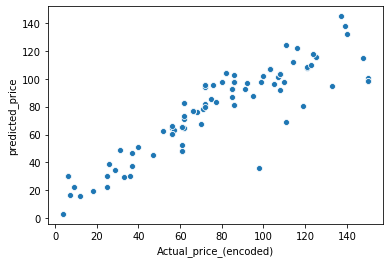

In [60]:
sns.scatterplot(x="Actual_price_(encoded)", y="predicted_price",data=df_2,palette="set2")

In [61]:
#y = m1*Ram+ m2*Rom+ m3*Expandable +m4*Screen +m5*Secondary_Camera +m6*Battery+m7*Warranty......+b

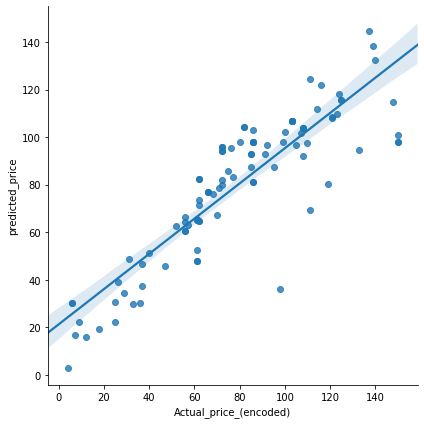

In [62]:
sns.lmplot(x="Actual_price_(encoded)", y="predicted_price",data=df_2,palette="set1",height=6)

In [63]:
lr_model.coef_

array([ 9.80263447,  8.49374169, -2.78474221,  0.51293224,  1.1177527 ,
       -0.13397062,  0.        ,  2.61437022,  0.        ])

In [81]:
for coef in zip(df, lr_model.coef_):
    print(coef)

('price_encoded', 9.80263446889356)
('Ram_encoded', 8.493741694113469)
('Rom_encoded', -2.784742213322507)
('Expand_encoded', 0.5129322429512131)
('Screen_encoded', 1.1177526974795704)
('Secondary_Camera_encoded', -0.13397062212917543)
('Battery_encoded', 0.0)
('Warranty_encoded', 2.61437021501654)
('Rating_encoded', 0.0)


In [82]:
lr_model.intercept_

2.0964871285278264

In [65]:
9.80263447*2+ 8.49374169*5+(-2.78474221*6)+0.51293224*9+1.1177527*4+( -0.13397062*31)+  0*0+ 2.61437022*10+0*0+2.0964871285278264

78.54002519852783

In [66]:
df.head(4)

,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Rating_encoded,Dual_sim_encoded
0,40,1,2,6,19,3,41,0,12,0
1,40,1,2,6,19,3,41,0,12,0
2,71,2,5,6,9,4,31,0,10,0
3,81,1,2,5,5,3,16,0,9,0
